<a href="https://colab.research.google.com/github/jeevalakshmiv/ML/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use Logistic Regression to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Import Libraries

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns

## Load and review data

In [12]:
pdata = pd.read_csv("/content/archive (5).zip")


In [13]:
pdata.shape # Check number of columns and rows in data frame

(14397, 16)

In [14]:
pdata.head() # To check first 5 rows of data set

,track_id,artist_name,Song_Success,album_release_date,hit_n,Drums_Energy,Drums_Complexity,Variety_of_musical_instruments,Mixing_Quality,Harmonic_Richness,Mixing_Character,Emotional_Intensity,is_feat,n_feat,status_guest,higher_guest
0,5OFMeePbu2eEX1Hyf2tzYj,044 ROSE,hit,2017-06-23,0,1.748407,0.531356,0.677570,0.595927,1.209290,1.320058,1.661759,True,1,"0,1",1
1,29kkmN00FdzizRg5xrVmBF,044 ROSE,none,2017-12-08,1,0.714910,1.291384,0.735496,0.669723,0.673321,1.021614,0.460496,True,1,1,0
2,7L1tQKY6mcy0sGXntrABgW,044 ROSE,none,2018-02-13,1,0.778734,0.574680,0.950734,0.516571,0.672520,0.746304,1.007762,False,0,NaN,0
3,4jwDiUBqLQCCuyWkbX87qN,044 ROSE,none,2018-02-13,1,1.291229,0.561352,0.688906,0.514869,1.160833,0.977034,1.069928,True,1,"1,2",1
4,2DYUk5AkUV7kPTvd58LVCw,044 ROSE,none,2018-02-13,1,0.900054,0.551893,0.600117,0.786980,0.530228,1.006494,0.458813,False,0,NaN,0


In [15]:
pdata.isnull().values.any() # If there are any null values in data set

True

In [67]:
pdata.isnull().sum()

track_id                             0
artist_name                          0
Song_Success                         0
album_release_date                   0
hit_n                                0
Drums_Energy                         0
Drums_Complexity                     0
Variety_of_musical_instruments       0
Mixing_Quality                       0
Harmonic_Richness                    0
Mixing_Character                     0
Emotional_Intensity                  0
is_feat                              0
n_feat                               0
status_guest                      8656
higher_guest                         0
dtype: int64

In [68]:
pdata.dropna(inplace=True)

In [69]:
pdata.isnull().sum()

track_id                          0
artist_name                       0
Song_Success                      0
album_release_date                0
hit_n                             0
Drums_Energy                      0
Drums_Complexity                  0
Variety_of_musical_instruments    0
Mixing_Quality                    0
Harmonic_Richness                 0
Mixing_Character                  0
Emotional_Intensity               0
is_feat                           0
n_feat                            0
status_guest                      0
higher_guest                      0
dtype: int64

In [70]:
pdata.isnull().values.any()

False

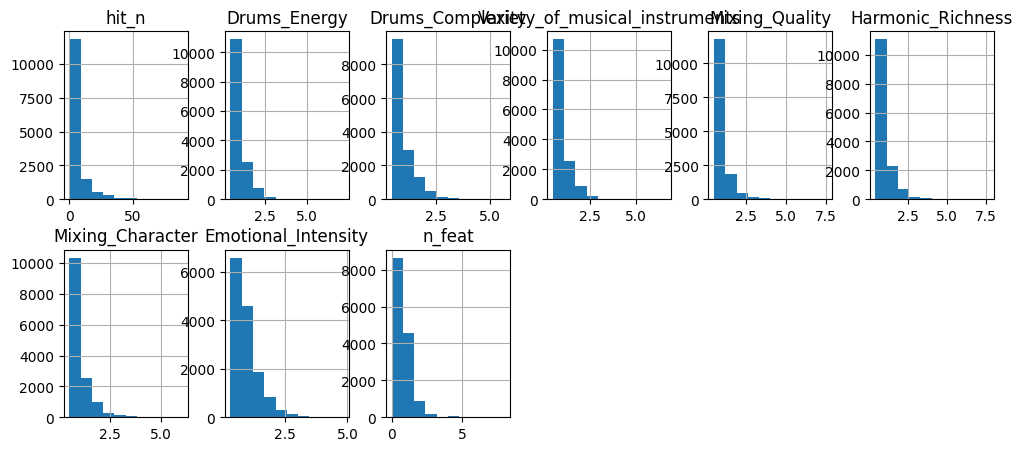

In [16]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only
pdata[columns].hist(stacked= True, bins=10, figsize=(12,39), layout=(14,6));
# Histogram of first 8 columns

## Identify Correlation in data

In [21]:
import pandas as pd

# Check for non-numeric values in each column
for col in pdata.columns:
    non_numeric_values = pdata[col].apply(lambda x: not isinstance(x, (int, float)))
    if non_numeric_values.any():
        print(f"Column '{col}' contains non-numeric values.")

Column 'track_id' contains non-numeric values.
Column 'artist_name' contains non-numeric values.
Column 'Song_Success' contains non-numeric values.
Column 'album_release_date' contains non-numeric values.
Column 'status_guest' contains non-numeric values.


In [18]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=5):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In [23]:
import pandas as pd

# Check for non-numeric values in each column
for col in pdata.columns:
    non_numeric_values = pdata[col].apply(lambda x: not isinstance(x, (int, float)))
    if non_numeric_values.any():
        print(f"Column '{col}' contains non-numeric values.")

Column 'track_id' contains non-numeric values.
Column 'artist_name' contains non-numeric values.
Column 'Song_Success' contains non-numeric values.
Column 'album_release_date' contains non-numeric values.
Column 'status_guest' contains non-numeric values.


In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

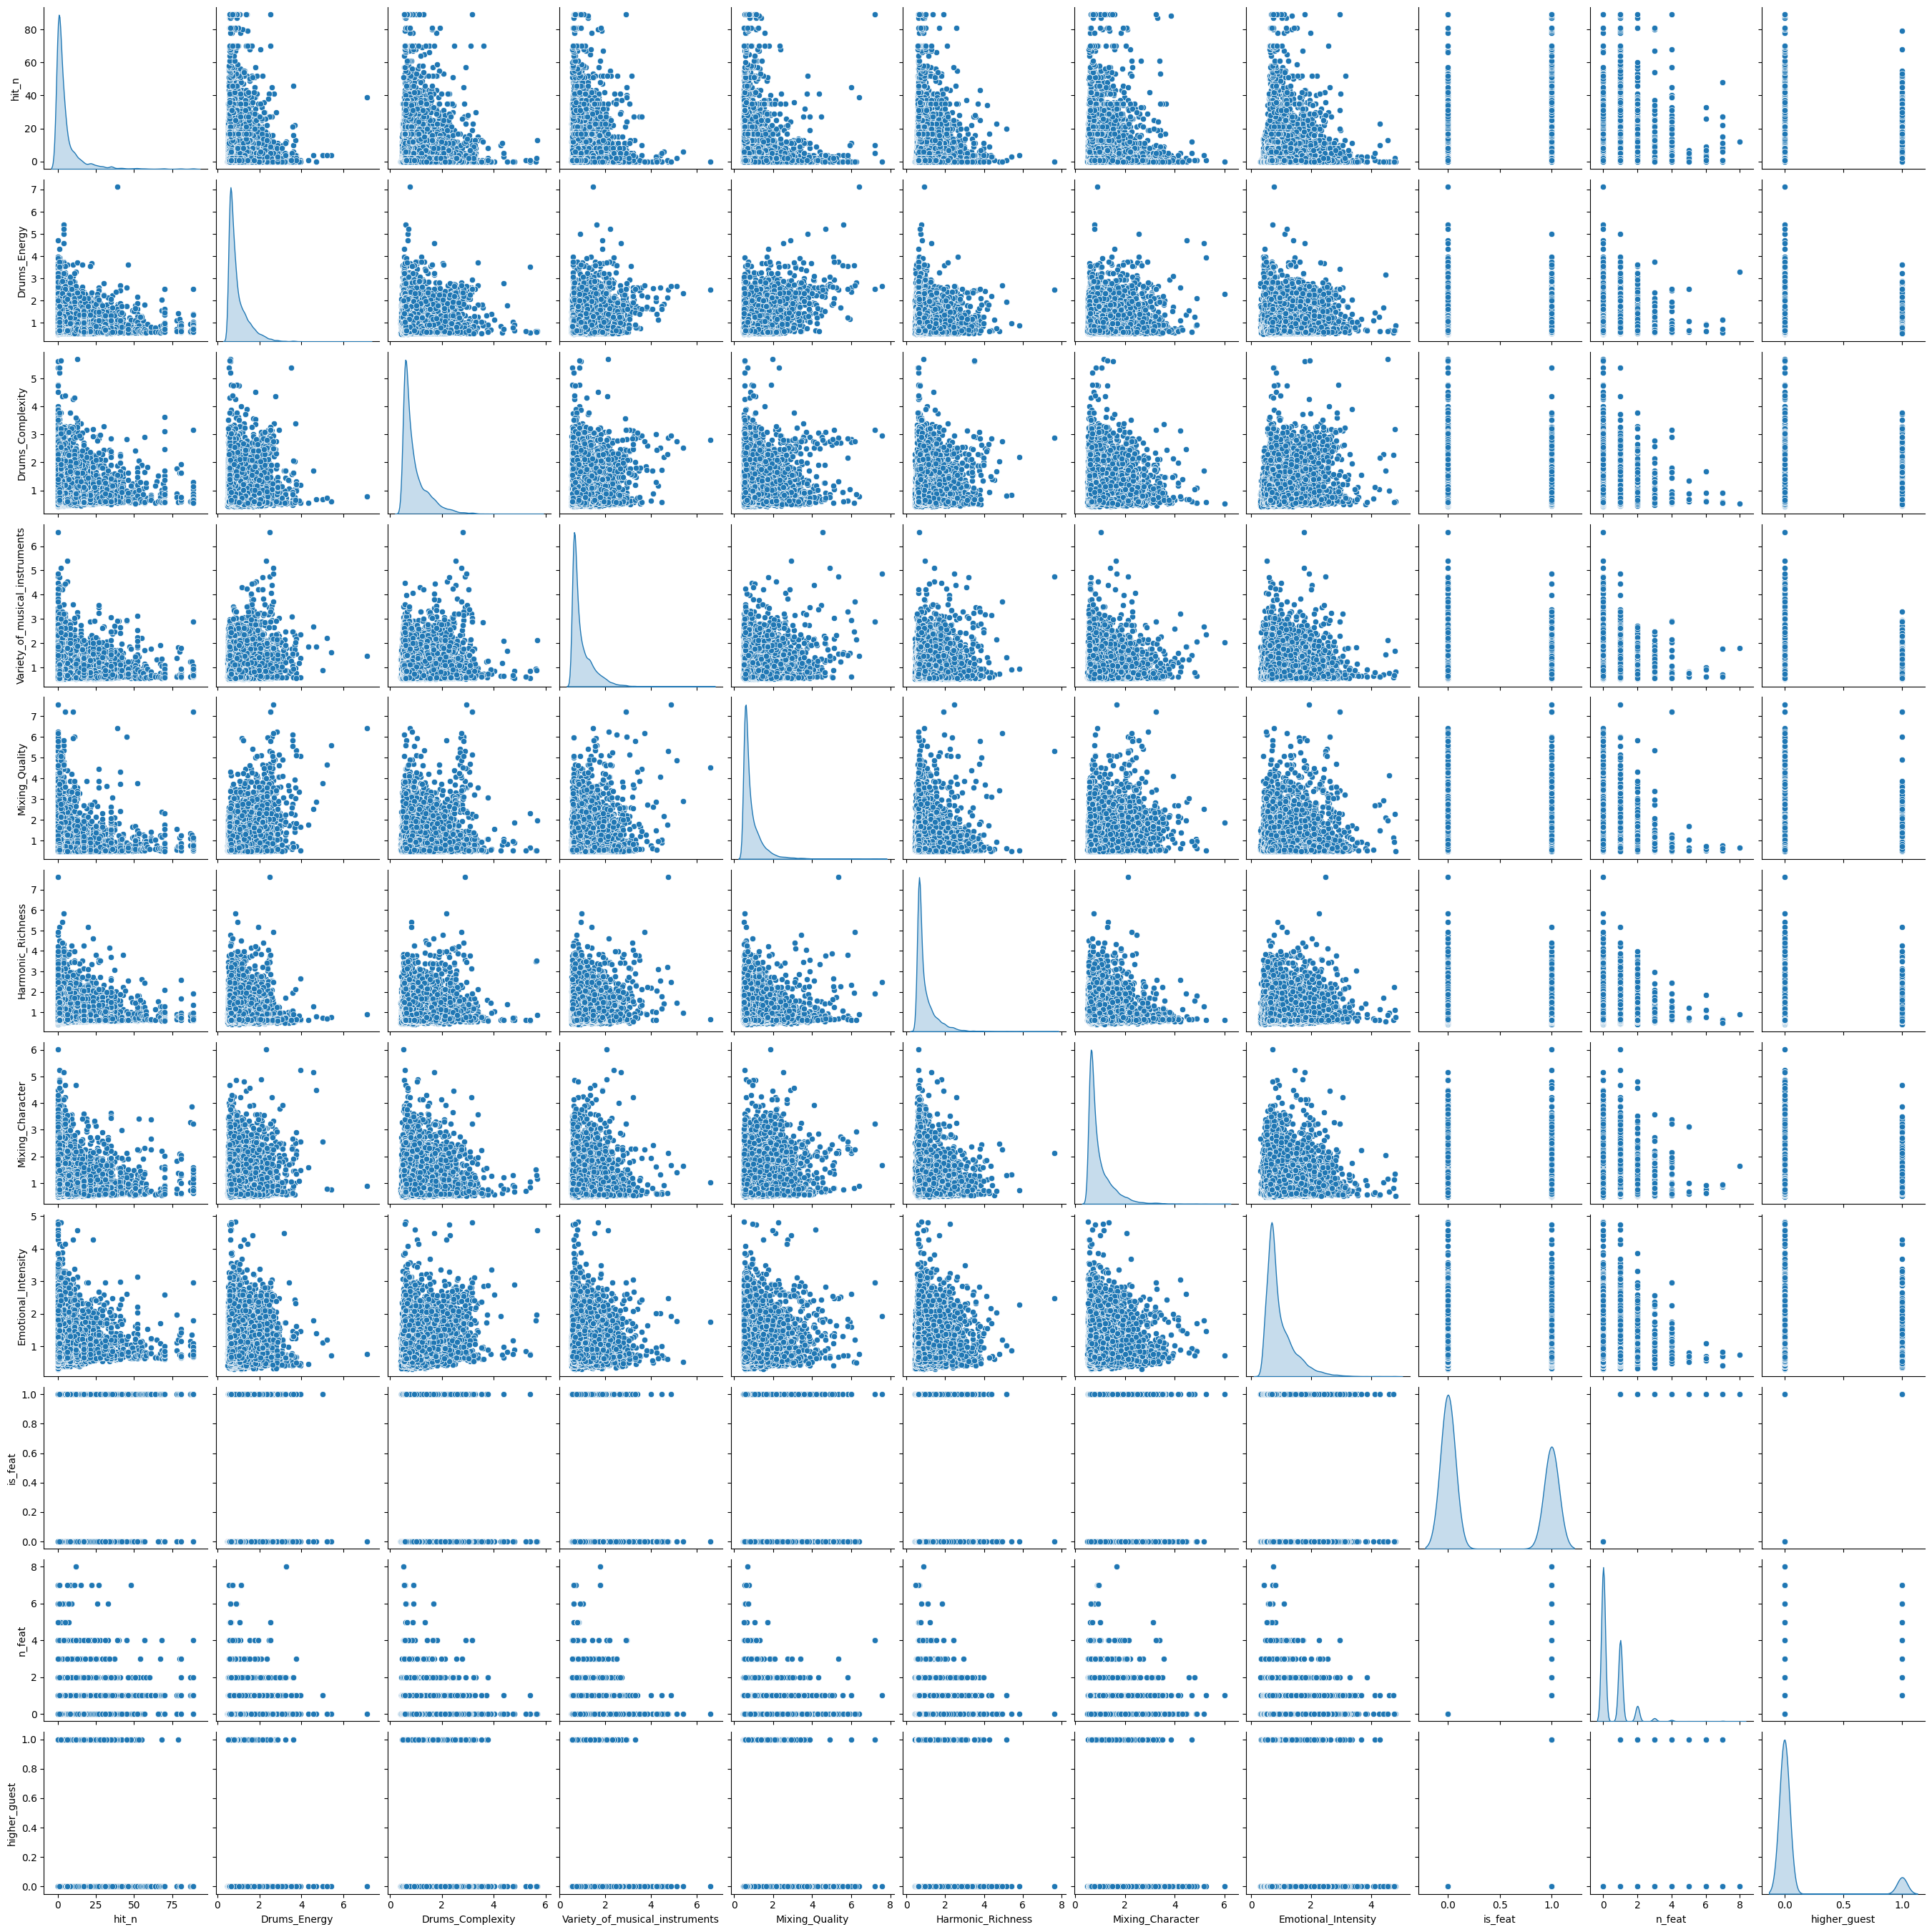

In [24]:
sns.pairplot(pdata,diag_kind='kde')

## Calculate diabetes ratio of True/False from outcome variable

In [26]:
n_true = len(pdata.loc[pdata['higher_guest'] == True])
n_false = len(pdata.loc[pdata['higher_guest'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 1394 (9.68%)
Number of false cases: 13003 (90.32%)


So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

Its a good distribution True/False cases of diabetes in data.

## Spliting the data
We will use 70% of data for training and 30% for testing.

In [27]:
from sklearn.model_selection import train_test_split

X = pdata.drop('higher_guest',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['higher_guest']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# 1 is just any random seed number

x_train.head()

,track_id,artist_name,Song_Success,album_release_date,hit_n,Drums_Energy,Drums_Complexity,Variety_of_musical_instruments,Mixing_Quality,Harmonic_Richness,Mixing_Character,Emotional_Intensity,is_feat,n_feat,status_guest
11299,4vIYY0wqf1eDzZPsjyqPHM,T1ONE,none,2021-08-07,4,0.692738,0.893509,0.620060,0.672478,0.622045,0.628231,1.396175,False,0,NaN
1616,6GxneRFCEKoQkXlW0c5qYm,Boulevard Depo,none,2020-05-29,15,0.616815,0.561165,0.923129,1.572742,1.075999,0.590773,1.009700,True,1,"0,15"
12457,1F9jFxcmld48ShpPb0jGoD,VTORNIK,none,2021-10-01,2,0.555354,0.620250,0.676224,0.819216,3.324686,0.804830,0.914150,False,0,NaN
13816,2nmeqGiCCLhDCdGQSyE2SJ,МОТ,none,2017-10-23,0,2.674435,2.751634,3.720021,6.167263,4.934819,2.269955,1.197041,False,0,NaN
1235,43RNYoUK2FpAnCQ81y5yJb,Big Baby Tape,none,2018-11-16,3,0.648366,0.558132,0.710310,0.592011,0.659699,0.622072,0.605213,True,1,"3,0"


Lets check split of data

In [28]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

80.00% data is in training set
20.00% data is in test set


# Data Preparation

### Check hidden missing values

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [29]:
x_train.head()

,track_id,artist_name,Song_Success,album_release_date,hit_n,Drums_Energy,Drums_Complexity,Variety_of_musical_instruments,Mixing_Quality,Harmonic_Richness,Mixing_Character,Emotional_Intensity,is_feat,n_feat,status_guest
11299,4vIYY0wqf1eDzZPsjyqPHM,T1ONE,none,2021-08-07,4,0.692738,0.893509,0.620060,0.672478,0.622045,0.628231,1.396175,False,0,NaN
1616,6GxneRFCEKoQkXlW0c5qYm,Boulevard Depo,none,2020-05-29,15,0.616815,0.561165,0.923129,1.572742,1.075999,0.590773,1.009700,True,1,"0,15"
12457,1F9jFxcmld48ShpPb0jGoD,VTORNIK,none,2021-10-01,2,0.555354,0.620250,0.676224,0.819216,3.324686,0.804830,0.914150,False,0,NaN
13816,2nmeqGiCCLhDCdGQSyE2SJ,МОТ,none,2017-10-23,0,2.674435,2.751634,3.720021,6.167263,4.934819,2.269955,1.197041,False,0,NaN
1235,43RNYoUK2FpAnCQ81y5yJb,Big Baby Tape,none,2018-11-16,3,0.648366,0.558132,0.710310,0.592011,0.659699,0.622072,0.605213,True,1,"3,0"


In [30]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11517 entries, 11299 to 13349
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        11517 non-null  object 
 1   artist_name                     11517 non-null  object 
 2   Song_Success                    11517 non-null  object 
 3   album_release_date              11517 non-null  object 
 4   hit_n                           11517 non-null  int64  
 5   Drums_Energy                    11517 non-null  float64
 6   Drums_Complexity                11517 non-null  float64
 7   Variety_of_musical_instruments  11517 non-null  float64
 8   Mixing_Quality                  11517 non-null  float64
 9   Harmonic_Richness               11517 non-null  float64
 10  Mixing_Character                11517 non-null  float64
 11  Emotional_Intensity             11517 non-null  float64
 12  is_feat                         1

We can see lots of 0 entries above.

### Replace 0s with serial mean

In [32]:
# Create a list of numeric columns
numeric_cols = x_train.select_dtypes(include=[np.number]).columns

# Impute missing values in numeric columns only
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
rep_0.fit(x_train[numeric_cols])

# Transform both training and test sets
x_train[numeric_cols] = rep_0.transform(x_train[numeric_cols])
x_test[numeric_cols] = rep_0.transform(x_test[numeric_cols])

# Logistic Regression

In [34]:
# Impute missing values in numeric columns only
numeric_cols = x_train.select_dtypes(include=[np.number]).columns
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
rep_0.fit(x_train[numeric_cols])
x_train[numeric_cols] = rep_0.transform(x_train[numeric_cols])
x_test[numeric_cols] = rep_0.transform(x_test[numeric_cols])

# Check for non-numeric columns
non_numeric_cols = x_train.select_dtypes

In [39]:
x_test = pd.get_dummies(x_test)

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Identify numeric and categorical features
numeric_features = x_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = x_train.select_dtypes(include=["object"]).columns

# Define the preprocessing steps for numeric features
numeric_preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

# Define the preprocessing steps for categorical features
categorical_preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehotencoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing steps for numeric and categorical features
preprocessing = ColumnTransformer([
    ("numeric", numeric_preprocessing, numeric_features),
    ("categorical", categorical_preprocessing, categorical_features)
])

# Define the model
model = LogisticRegression()

# Create the pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("model", model)
])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Predict using the pipeline
y_predict = pipeline.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyError: "None of [Index(['track_id', 'artist_name', 'Song_Success', 'album_release_date',\n       'status_guest'],\n      dtype='object')] are in the [columns]"

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 48

True Negatives (TN): we correctly predicted that they don't have diabetes 132

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 37 Falsely predict negative Type II error